**INTRODUCTION:**
Health insurance is a critical aspect for healthcare industry in today's world.By accurately predicting the health insurance cost for individuals or families, insurance companies can offer customized insurance plans that are affordable and cover the specific health needs for their customers. This can generate increased customer satisfaction, better health outcomes, and increased revenue for insurance companies.

Accurately predicting the cost of insurance can also help insurance companies offer customized plans that are affordable and cover the specific needs of their customers.

To identify patterns in the data and important features, we can use various data analysis techniques such as exploratory data analysis (EDA), data visualization, and feature engineering. EDA can help us identify trends, patterns, and relationships in the data, while feature engineering can help us extract relevant features from the data that improve the accuracy of the ML model.

For the machine learning approach, we can use various models such as linear regression,SVR,random forests and Gradient Booster to predict the health insurance cost.To compare all models, we can use various evaluation metrics such as mean squared error, mean absolute error, and R-squared score.

Overall, this project can provide valuable insights into predicting health insurance costs and can have significant impact for the healthcare and insurance industry.

###*1) Why is this proposal important in today’s world? How predicting a health ###*insurance cost accurately can affect the health care/insurance field?
The proposal is important in today's world because accurate prediction of health insurance costs can greatly impact the health care/insurance field in various ways such as :

It can help the insurance companies to better estimate premiums.
It can help to allocated the resources to higher uses.
It can provide with more affordable and customized health insurance plans to their customers.
It can also help individuals and families to make informed decisions about their health care coverage, and access appropriate health care services.
  
 ### 2)   If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?
  
  The proposed method can be helpful in the future for other types of insurance as well, such as life insurance or disability insurance, by leveraging similar data analysis and machine learning techniques to predict insurance premiums based on relevant factors.

###3) Please aim to identify patterns in the data and important features that may impact an ML model.

The project aims to conduct extensive data analysis and the implementation of various machine learning techniques in Python in order to create the best model with the most important features of a health care insurance in terms of both business value and realistic perspective.Feature engineering techniques such as normalization, encoding categorical variables, and handling missing values may also be applied to prepare the data for model training.Overall, the data analysis and machine learning approach will involve a systematic and iterative process of exploring the data, selecting relevant features, training and evaluating multiple models, and optimizing the model for prediction accuracy. This approach will help to create a robust and accurate machine learning model for predicting health insurance costs based on the given dataset.

###Aim:

Performing necessary feature engineering step to clean clean and modify the data.
Identifying important features that may play important role to predict health insurance cost
Predicitng health insurance cost using a machine learning model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy
from scipy import stats

1.Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_excel('/content/Health_insurance_cost.xlsx')

In [ ]:
# first 5 rows of the dataframe
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking for missing values
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

DATA CLEANING : Dropping the duplicates and imputing the missing values using MICE imputer.

In [ ]:
df = df.drop_duplicates()

We need to convert categorical data like gender, smoking status and location into numerical data before replcaing the missing data.

In [ ]:
df['gender']= df.gender.map({'male': 0, 'female': 1})
df['smoking_status']= df.smoking_status.map({'yes': 0, 'no': 1})
df['location']= df.location.map({'southwest': 0, 'southeast': 1,'northwest' : 2, 'northeast': 3})

MICE algorithm imputes missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer#installing important libraries
MICE_imputer = IterativeImputer()
df_mice = df.copy(deep = True)
df.iloc[:,:]=MICE_imputer.fit_transform(df_mice)

<ipython-input-133-c056a488190c>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,:]=MICE_imputer.fit_transform(df_mice)


We check for null values once again.

In [ ]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

2.Visualization

As we can see BMI and age show a strong relationship towards health insurance price.

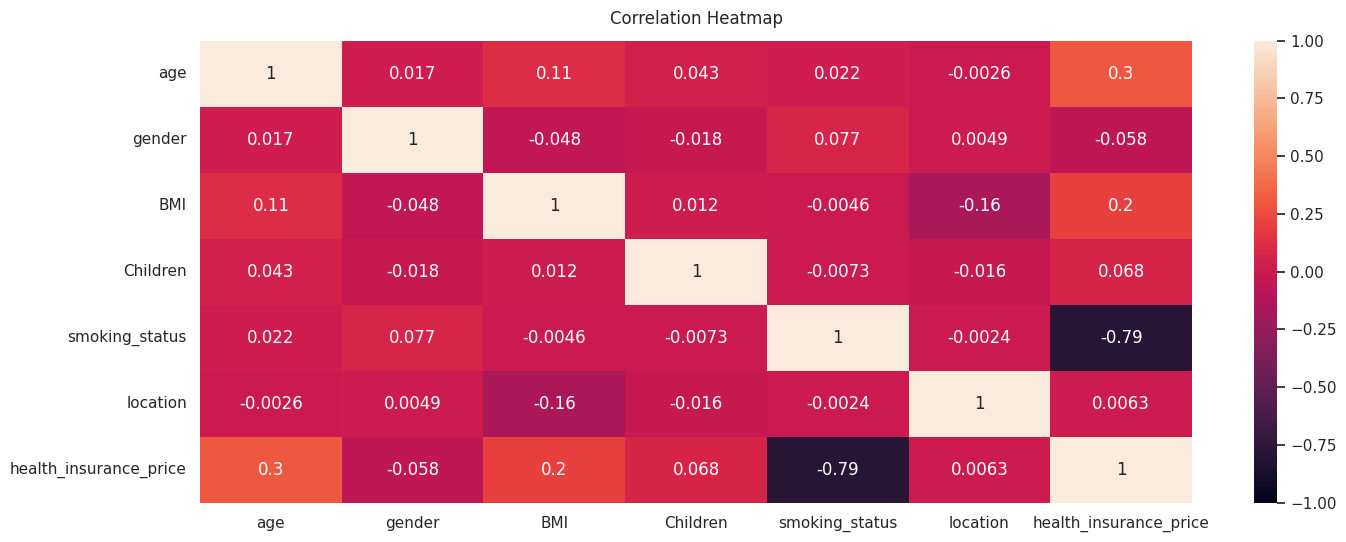

In [ ]:
# size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<ipython-input-137-d551254e4f72>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])


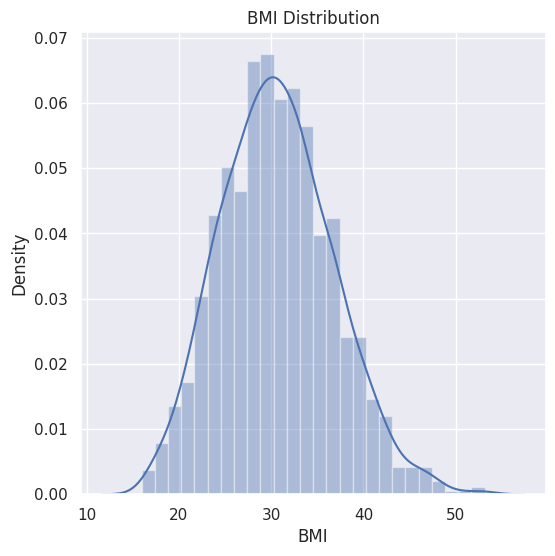

In [ ]:
plt.figure(figsize=(6,6)) #bmi distribution using matplotlib
sns.distplot(df['BMI'])
plt.title('BMI Distribution')
plt.show()

<ipython-input-152-8f7e8d1092d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


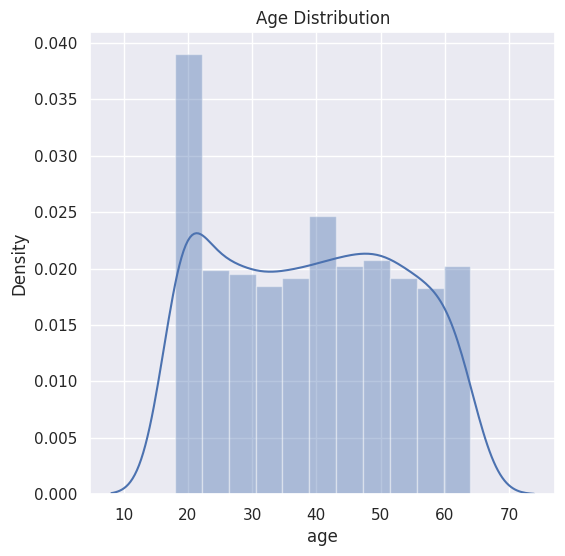

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

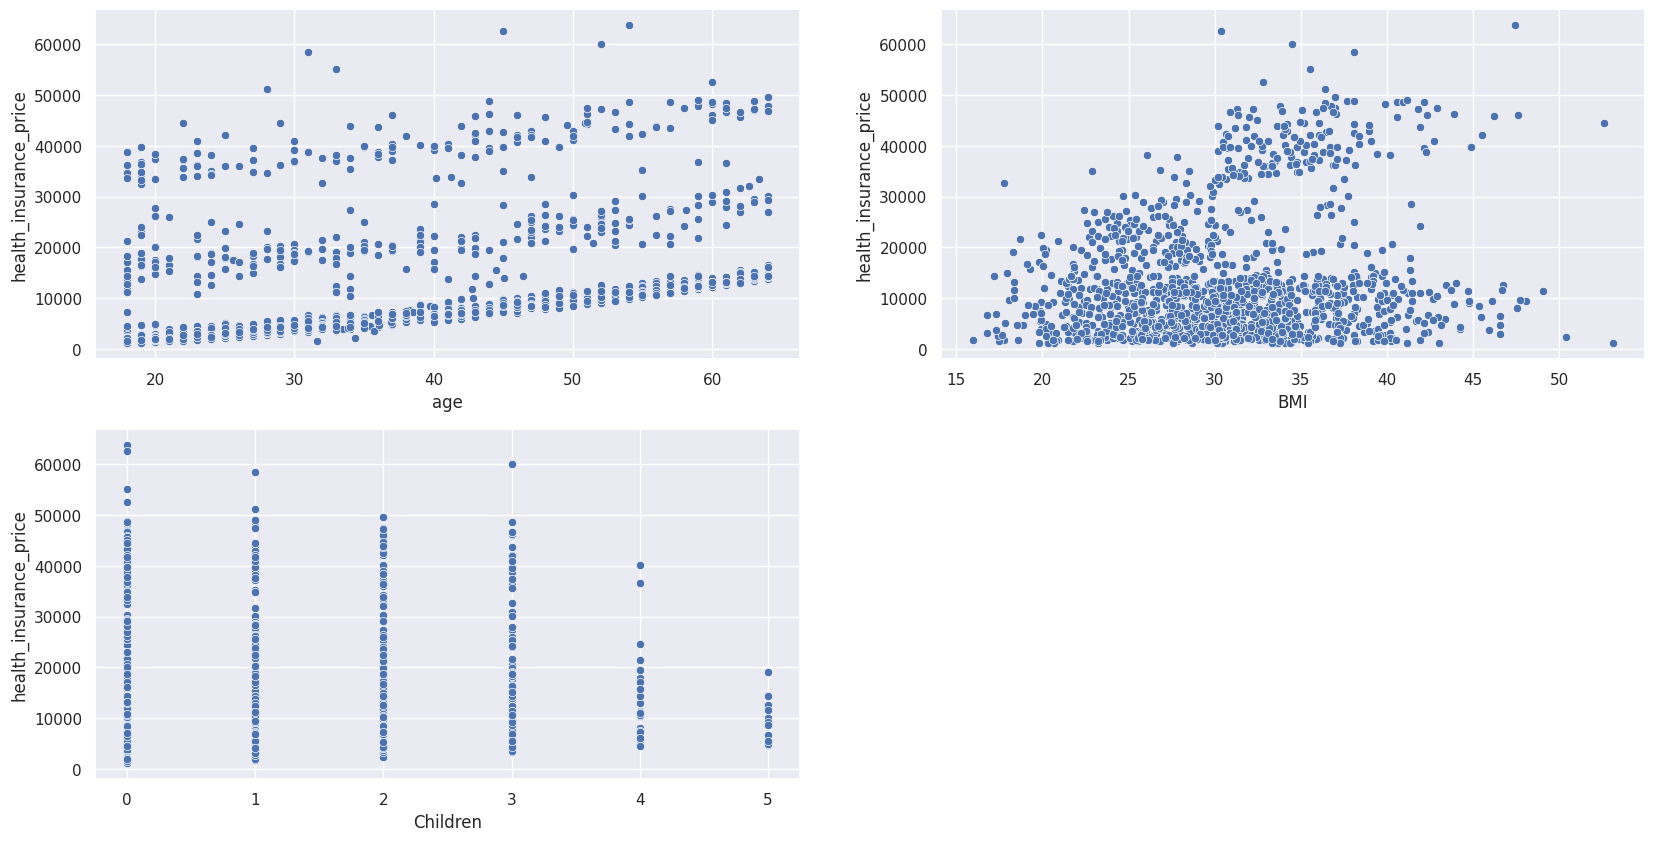

In [ ]:
# Visualizing features

plt.figure(figsize=(20,10))
for i,feat in enumerate(['age','BMI','Children']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feat],y=df.health_insurance_price)
plt.show()

Findings :-

1.Older people has to pay more premium than younger ones

2.Higher BMI persons has to pay more than lower ones

3.Having high number of childern means can only spend less expenses on insurance

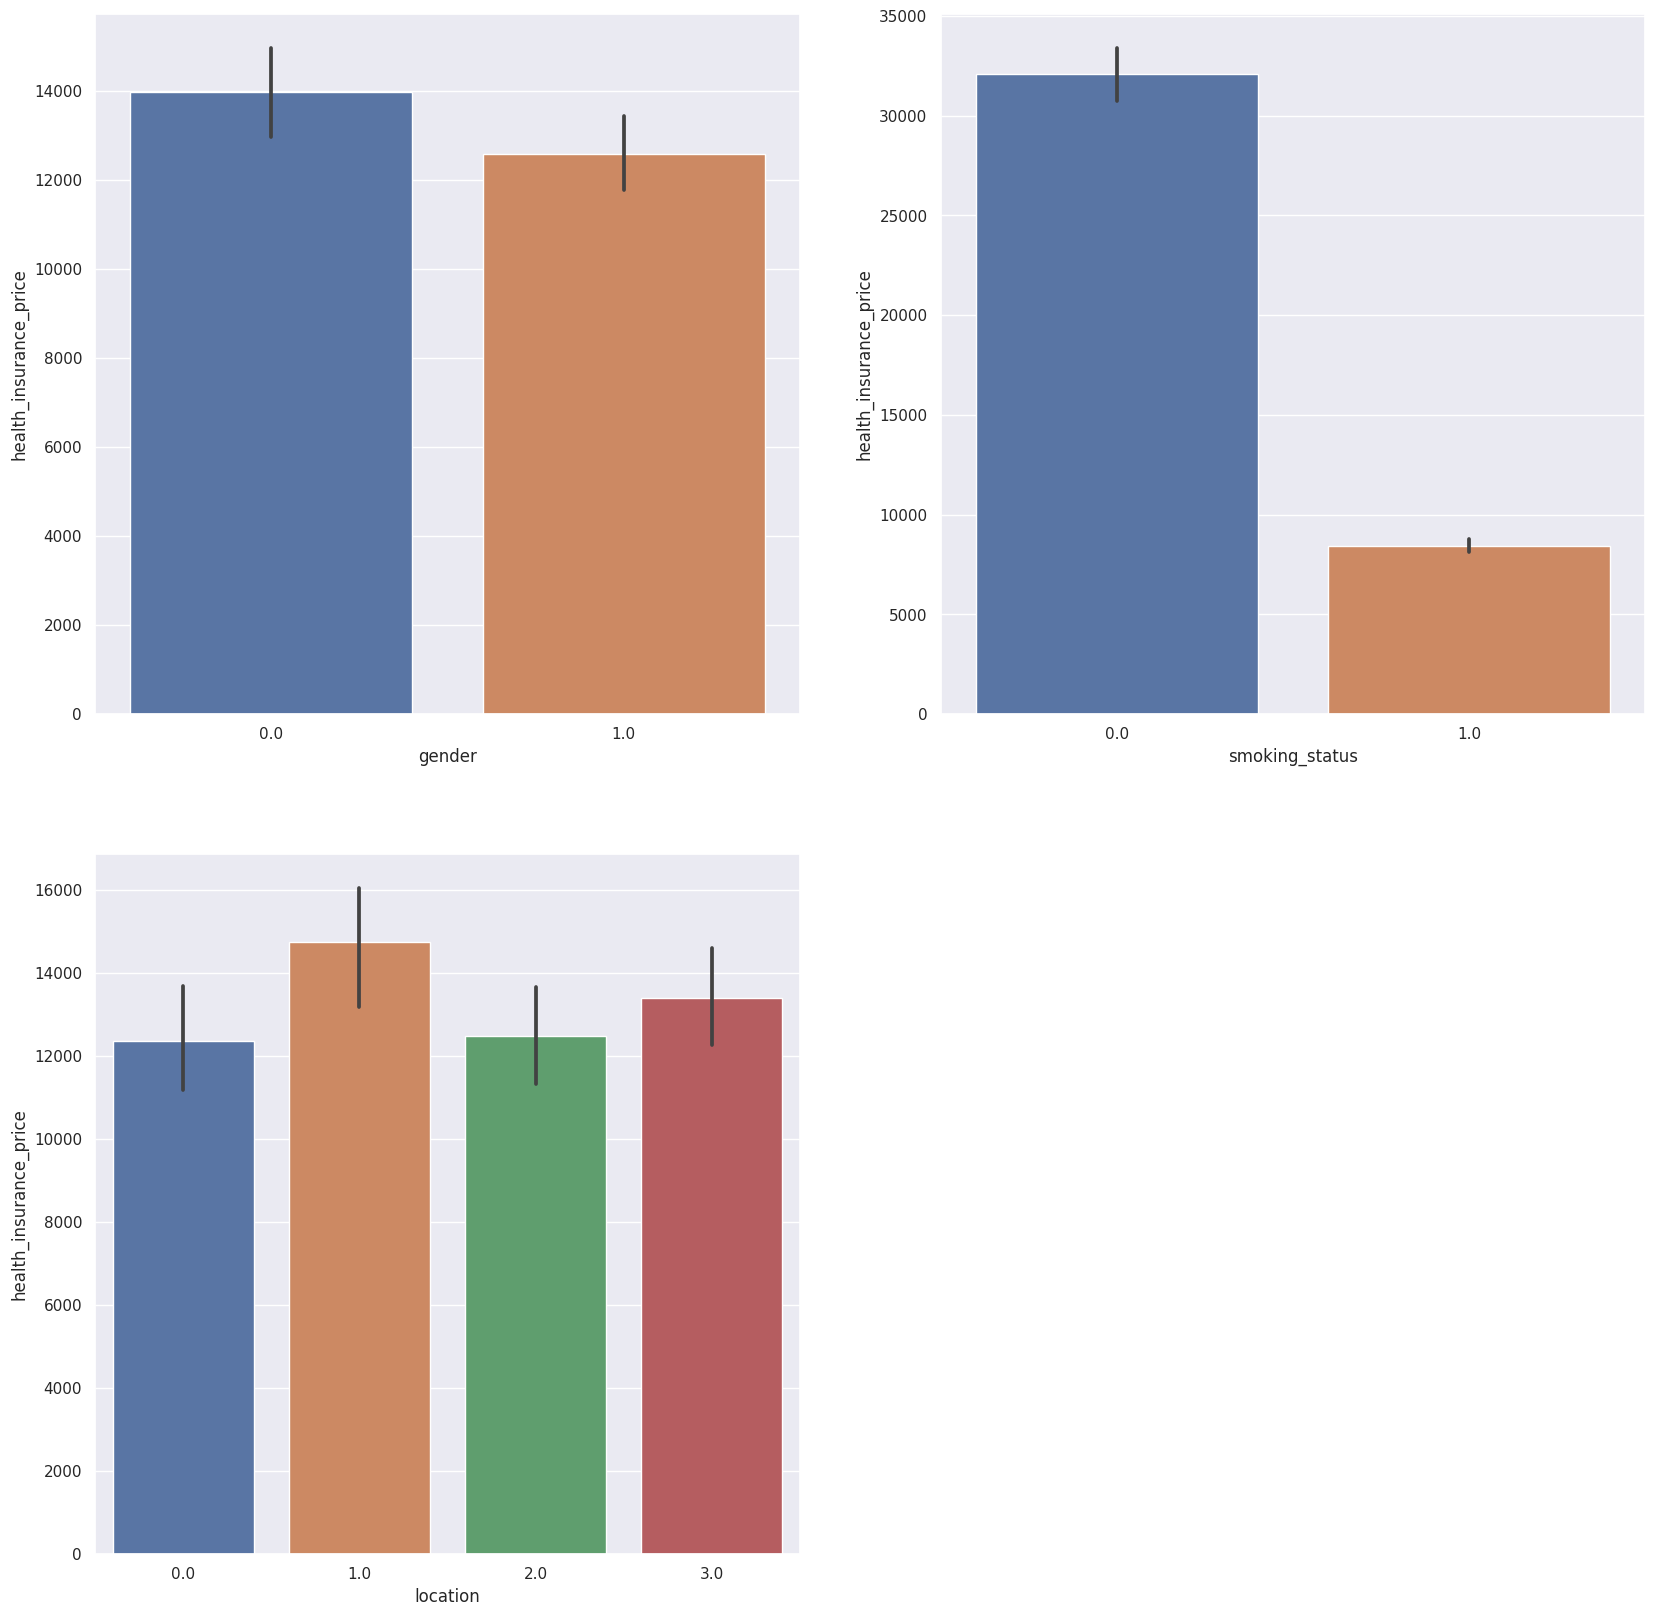

In [ ]:
plt.figure(figsize=(20,20))
for i,feat in enumerate(['gender','smoking_status','location']):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df[feat],y=df.health_insurance_price)
plt.show()

Observations: -

1.expenses doesnot varies much with respect to 'sex' feature

2.Smoker has to pay more than Non-Smoker

3.expenses doesnot varies much with respect to 'region' feature

3.Data pre-processing

Store Feature Matrix In X and Response(Target) In Vector y

In [ ]:
X = df[['BMI','age','gender','Children','smoking_status','location']]
y = df['health_insurance_price']

Spliting the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

4.Machine Learning Approach

Import the models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

 Prediction on Test Data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [ ]:
df1

,Actual,Lr,svm,rf,gr
900,8688.85885,8099.961251,9348.981564,10518.154540,10691.258038
1064,5708.86700,5553.984189,9225.721125,5952.180326,7307.176665
1256,11436.73815,14464.118787,9368.436970,13898.204861,13156.850673
298,38746.35510,31726.953623,9239.285639,42312.207965,39097.206442
237,4463.20510,9149.885109,9242.318729,6906.456192,6197.824134
...,...,...,...,...,...
534,13831.11520,17081.014767,9428.011606,14220.107870,14221.821593
542,13887.20400,15627.031303,9427.255762,14227.070925,14935.640387
760,3925.75820,6271.133006,9200.475556,12054.046733,7512.422143
1284,47403.88000,38362.815183,9419.976716,47950.582023,49052.970503


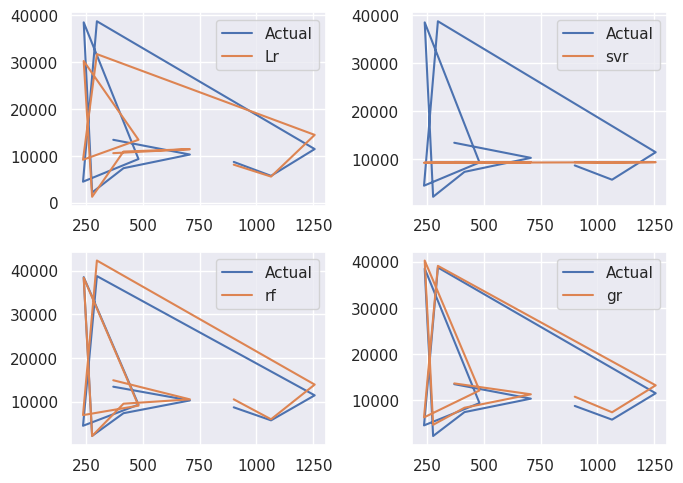

In [ ]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

Evaluating the Algorithm

In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.8062788710211515 -0.1309044709233269 0.8842107646419296 0.9009322403755273


Gradient Boosting Algorithm is giving best performance for given problem with r2 score of 0.9009621266053023

Predicting Charges For New Customer

In [ ]:
data = {'BMI' : 40.30,'age' : 40,'gender' : 1,'Children' : 4,'smoking_status' : 1,'location' : 2}


In [ ]:
df1 = pd.DataFrame(data,index=[0])
df1

,BMI,age,gender,Children,smoking_status,location
0,40.3,40,1,4,1,2


In [ ]:
new_pred = gr.predict(df1)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  10263.750972816972
